# Homework 4

by Michael Roper

## Problem 1

The problem is sketched graphically in the following code.

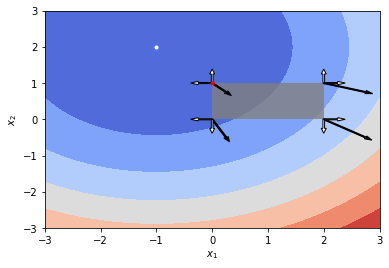

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define objective function.
def obj(v): return (v[0] + 1)**2 + (v[1] - 2)**2

# Compute function values.
x = [np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000)]
x = np.meshgrid(x[0], x[1])
f = obj(x)

# Plot contour and shade feasible region based on the following:
# g(1) = x(1) <= 2
# g(2) = x(2) <= 1
# g(3) = x(1) >= 0
# g(4) = x(2) >= 0
plt.contourf(x[0], x[1], f, cmap=cm.coolwarm)
plt.fill([0, 0, 2, 2], [0, 1, 1, 0], 'gray', alpha=0.8)
plt.plot(-1, 2, 'wo', markersize=3)
plt.plot(0, 1, 'ro', markersize=3)

# Plot directions of gradient at corner points of feasible domain.
plt.arrow(0, 1, .25, -.25, width=.03, facecolor='black')
plt.arrow(0, 1, 0, .25, width=.03, facecolor='white')
plt.arrow(0, 1, -.25, 0, width=.03, facecolor='white')

plt.arrow(0, 0, .25, -.5, width=.03, facecolor='black')
plt.arrow(0, 0, -.25, 0, width=.03, facecolor='white')
plt.arrow(0, 0, 0, -.25, width=.03, facecolor='white')

plt.arrow(2, 0, .75, -.5, width=.03, facecolor='black')
plt.arrow(2, 0, .25, 0, width=.03, facecolor='white')
plt.arrow(2, 0, 0, -.25, width=.03, facecolor='white')

plt.arrow(2, 1, .75, -.25, width=.03, facecolor='black')
plt.arrow(2, 1, 0, .25, width=.03, facecolor='white')
plt.arrow(2, 1, .25, 0, width=.03, facecolor='white')

# Add labels to axes.
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

The grey region is the feasible domain defined by the given constraints of the problem. The white point denotes the global minimum and the red point represents the local solution. The black arrows indicate the directions of the gradient of $f$ at the corners of the feasible domain.

The white arrows indicate the directions of the gradient of $g_i$ at the corners of the feasible domain.

$$
\frac{\partial g_1}{\partial x} = \begin{bmatrix}1\\0\end{bmatrix}
$$

$$
\frac{\partial g_2}{\partial x} = \begin{bmatrix}0\\1\end{bmatrix}
$$

$$
\frac{\partial g_3}{\partial x} = \begin{bmatrix}-1\\0\end{bmatrix}
$$

$$
\frac{\partial g_4}{\partial x} = \begin{bmatrix}0\\-1\end{bmatrix}
$$

The Lagrangian formulation for this problem is

$$
L = f + \mu_1g_1 + \mu_2g_2 + \mu_3g_3 + \mu_4g_4 = (x_1 + 1)^2 + (x_2 - 2)^2 + \mu_1(x_1 - 2) + \mu_2(x_2 - 1) + \mu_3(-x_1) + \mu_4(-x_2)
$$

$$
\frac{\partial L}{\partial x} = \begin{bmatrix}2(x_1 + 1) + \mu_1 - \mu_3\\2(x_2 - 2) + \mu_2 - \mu_4\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}
$$

The following is true at the graphical optimum $(0,1)$:

$$
g_2 = 0, g_3 = 0, \mu_2 > 0, \mu_3 > 0, \mu_1 = \mu_4 = 0
$$

$$
\begin{bmatrix}2(0 + 1) - \mu_3\\2(1 - 2) + \mu_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix} \to \mu_2 = \mu_3 = 2 > 0
$$

Therefore, the KKT conditions are satisfied because $\frac{\partial L}{\partial x} = 0$ and $\mu_2$ and $\mu_3$ are greater than zero at $(0,1)$. To verify the second-order optimality conditions,

$$
L_{xx} = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix}
$$

Because $dx_1 + dx_2 = 0$ and $dx \neq 0$,

$$
dx^TL_{xx}dx = 2dx_1^2 + 2dx_2^2 \leq 0
$$

since $dx_i^2$ is always greater than zero. Therefore, $(0,1)$ is a local solution.

## Problem 2

The problem is sketched graphically in the following code.

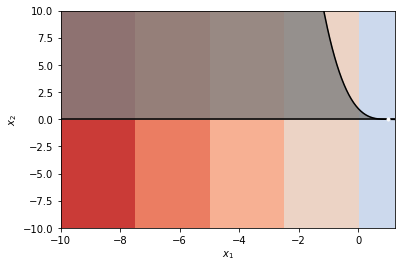

In [2]:
# Define objective function
def f(v): return -v[0]

# Define constraint functions
def g_1(v): return v[1] - (1 - v[0])**3

def g_2(v): return -v[1]

# Compute function values
x = [np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000)]
x_grid = np.meshgrid(x[0], x[1])
# f = f(x)

plt.contourf(x[0], x[1], f(x_grid), cmap=cm.coolwarm)
plt.plot(x[0], (1 - x[0])**3, 'k')
plt.fill_between(x[0], (1 - x[0])**3, color='grey', alpha=0.8)
plt.plot(x[1], np.zeros(len(x[1])), 'k')
plt.plot(1, 0, 'wo', markersize=3)
plt.xlim([-10, 1.25])
plt.ylim([-10, 10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

The grey region is the feasible domain defined by the given constraints of the problem. The optimal solution was determined graphically to be $\textbf{x} = (1,0)$, represented by the white point on the plot, as this is clearly the minimal solution that satisfies the constraints.

The Lagrangian $L$ and its derivative $\frac{\partial L}{\partial x}$ are

$$
L = -x_1 + \mu_1(x_2 - (1 - x_1)^3) + \mu_2(-x_2)
$$

$$
\frac{\partial L}{\partial x} = \begin{bmatrix}-1 + 3\mu_1(1 - x_1)^2\\\mu_1 - \mu_2\end{bmatrix}
$$

Using this, the KKT conditions are applied at the point $\textbf{x} = (1,0)$.

1. Setting $\frac{\partial L}{\partial x}$ at the point $\textbf{x} = (1,0)$ to zero,

$$
\begin{bmatrix}-1 + 3\mu_1(1 - x_1)^2\\\mu_1 - \mu_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}
$$

we end up with

$$
-1 + 3\mu_1(1 - 1)^2 = 0 \to -1 = 0
$$

Therefore, the KKT conditions are not satisfied at this point although it is an optimal solution. The KKT conditions are neither sufficient nor necessary.

## Problem 3

### Reduced Gradient

$m = 1\\n = 3\\n - m = 2$

Choosing $d = \begin{bmatrix}x_1\\x_2\end{bmatrix}$ and $s = x_3$,

$$
\frac{\partial f}{\partial d} = \begin{bmatrix}-x_2 - x_3\\-x_1 - x_3\end{bmatrix}
$$

$$
\frac{\partial f}{\partial s} = -x_2 - x_1
$$

$$
\frac{\partial h}{\partial d} = \begin{bmatrix}1\\1\end{bmatrix}
$$

$$
\frac{\partial h}{\partial s} = 1
$$

The reduced gradient is

$$
\frac{df}{dd} = \frac{\partial f}{\partial d} - \frac{\partial f}{\partial s}\left(\frac{\partial h}{\partial s}\right)^{-1}\frac{\partial h}{\partial d} = \begin{bmatrix}-x_2 - x_3\\-x_1 - x_3\end{bmatrix} - (-x_2 - x_1)(1^{-1})\begin{bmatrix}1\\1\end{bmatrix} = \begin{bmatrix}-x_3 + x_1\\-x_3 + x_2\end{bmatrix}
$$

Setting the reduced gradient to zero,

$$
\begin{bmatrix}-x_3 + x_1\\-x_3 + x_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix} \to x_1 = x_2 = x_3
$$

Using this solution and the equality constraint $x_1 + x_2 + x_3 - 3 = 0$,

$$
x_1 + x_1 + x_1 - 3 = 3x_1 - 3 = 0 \to x_1 = x_2 = x_3 = 1
$$

### Lagrangian Method

The Lagrangian $L$ for this problem is

$$
L = -x_1x_2 - x_2x_3 - x_1x_3 + \lambda(x_1 + x_2 + x_3 - 3)
$$

Setting the gradient to zero,

$$
\frac{\partial L}{\partial x} = \begin{bmatrix}-x_2 - x_3 + \lambda\\-x_1 - x_3 + \lambda\\-x_2 - x_1 + \lambda\end{bmatrix} = \begin{bmatrix}0\\0\\0\end{bmatrix}
$$

$$
x_1 = x_2 = x_3 = \frac{\lambda}{2}
$$

$$
\frac{\partial L}{\partial \lambda} = x_1 + x_2 + x_3 - 3
$$

$$
\frac{\lambda}{2}+\frac{\lambda}{2}+\frac{\lambda}{2} - 3 = \frac{3\lambda}{2} - 3 = 0 \to \lambda = 2 > 0
$$

Therefore, $x_1 = x_2 = x_3 = 1$ and the first-order KKT conditions are satisfied. To verify second-order optimality conditions,

$$
L_{xx} = \begin{bmatrix}0 & -1 & -1\\-1 & 0 & -1\\-1 & -1 & 0\end{bmatrix}
$$

and from the constraint $h$,

$$
dx_2^2 + dx_2dx_3 + dx_3^2 \geq 0
$$

This quantity will always be greater than zero for a feasible perturbation ($dx \neq 0$) because the sum of squares of $dx_2$ and $dx_3$ will always be larger than its product, and $dx_2^2$ and $dx_3^2$ are always positive. Therefore, the second-order KKT conditions are satisfied and $x_1 = x_2 = x_3 = 1$ is a local solution.

## Problem 4

$m = 1\\n = 2\\n-m = 1$

Choosing $d = x_1$ and $s = x_2$, and converting to minimization problem by negating $f$,

$$
\frac{\partial f}{\partial d} = -2
$$

$$
\frac{\partial f}{\partial s} = -b
$$

$$
\frac{\partial h}{\partial d} = 2x_1
$$

$$
\frac{\partial h}{\partial s} = 2x_2
$$

The reduced gradient is

$$
\frac{df}{dd} = \frac{\partial f}{\partial d} - \frac{\partial f}{\partial s}\left(\frac{\partial h}{\partial s}\right)^{-1}\frac{\partial h}{\partial d} = -2 + b(2x_1)^{-1}(2x_2) = -2 + \frac{x_2}{x_1}b
$$

Setting the reduced gradient to zero at the point $\textbf{x} = (1,2)$,

$$
-2 + \left(\frac{2}{1}\right)b = 0 \to b = 1
$$

## Problem 5

In [3]:
# Compute f
def f(v): return v[0]**2 + v[1]**2 + v[2]**2

# Compute h
def h(v): return [[v[0]**2/4 + v[1]**2/5 + v[2]**2/25 - 1], [v[0] + v[1] - v[2]]]

# Compute dh/ds
def dhds(v): return [[2*v[1]/5, 2*v[2]/25], [1, -1]]

# Compute norm
def norm(v): return [[v[0][0]**2 + v[0][1]**2 + v[0][2]**2], [v[1][0]**2 + v[1][1]**2 + v[1][2]**2]]

# Implement Levenberg-Marquardt algorithm
def leven_marq(d, s):
    x = [[d], [s]]
    error = 1e-6
    lam = 1e-6
    while norm(h(x)) > error:
        dh_ds = dhds(x)
        s = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(dh_ds), dh_ds) + lam*np.eye(3)), np.transpose(dh_ds)), h(x))
        x = [[d], [s]]

I was unable to debug the remainder of my generalized reduced gradient algorithm. I will try to finish and turn it in late.